In [ ]:
# Adding data from Google Could Storage to Colab File System
from google.colab import drive
drive.mount('/content/gdrive')

from google.colab import auth
auth.authenticate_user()

!echo "deb http://packages.cloud.google.com/apt gcsfuse-bionic main" > /etc/apt/sources.list.d/gcsfuse.list
!curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | apt-key add -
!apt -qq update
!apt -qq install gcsfuse

!mkdir floodsDataset
!gcsfuse --implicit-dirs sen1floods11 floodsDataset

Mounted at /content/gdrive
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2537  100  2537    0     0  61878      0 --:--:-- --:--:-- --:--:-- 61878
OK
45 packages can be upgraded. Run 'apt list --upgradable' to see them.
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'apt autoremove' to remove them.
The following NEW packages will be installed:
  gcsfuse
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 11.5 MB of archives.
After this operation, 27.2 MB of additional disk space will be used.
Selecting previously unselected package gcsfuse.
(Reading database ... 155203 files and directories currently installed.)
Preparing to unpack .../gcsfuse_0.41.1_amd64.deb ...
Unpacking gcsfuse (0.41.1) ...
Setting up gcsfuse (0.41.1) ...
2022/05/05 01:56:52.489796 Start gcsfus

In [ ]:
import tifffile as tfl
import numpy as np
import matplotlib.pyplot as plt
import glob as glob
import keras as k
from tensorflow import keras
import os


# Label Hand with S1 Hand Training data


In [ ]:
!ls /content/floodsDataset/v1.1/data/flood_events/HandLabeled/LabelHand/

Bolivia_103757_LabelHand.tif	Paraguay_153941_LabelHand.tif
Bolivia_129334_LabelHand.tif	Paraguay_172476_LabelHand.tif
Bolivia_195474_LabelHand.tif	Paraguay_179624_LabelHand.tif
Bolivia_23014_LabelHand.tif	Paraguay_191503_LabelHand.tif
Bolivia_233925_LabelHand.tif	Paraguay_198534_LabelHand.tif
Bolivia_242570_LabelHand.tif	Paraguay_205585_LabelHand.tif
Bolivia_290290_LabelHand.tif	Paraguay_212687_LabelHand.tif
Bolivia_294583_LabelHand.tif	Paraguay_215904_LabelHand.tif
Bolivia_312675_LabelHand.tif	Paraguay_224845_LabelHand.tif
Bolivia_314919_LabelHand.tif	Paraguay_225187_LabelHand.tif
Bolivia_360519_LabelHand.tif	Paraguay_232281_LabelHand.tif
Bolivia_379434_LabelHand.tif	Paraguay_24341_LabelHand.tif
Bolivia_432776_LabelHand.tif	Paraguay_246154_LabelHand.tif
Bolivia_60373_LabelHand.tif	Paraguay_247656_LabelHand.tif
Bolivia_76104_LabelHand.tif	Paraguay_252217_LabelHand.tif
Ghana_103272_LabelHand.tif	Paraguay_271769_LabelHand.tif
Ghana_1033830_LabelHand.tif	Paraguay_280900_LabelHand.tif
Ghan

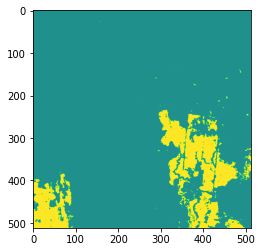

In [ ]:
path = '/content/floodsDataset/v1.1/data/flood_events/HandLabeled/LabelHand/Mekong_342411_LabelHand.tif'

plt.imshow(tfl.imread(path))


## Validation Data Creation


total validation images: 89
total validation masks: 89
First 5 training images of validation data ['/content/floodsDataset/v1.1/data/flood_events/HandLabeled/S1Hand/Ghana_5079_S1Hand.tif', '/content/floodsDataset/v1.1/data/flood_events/HandLabeled/S1Hand/Ghana_895194_S1Hand.tif', '/content/floodsDataset/v1.1/data/flood_events/HandLabeled/S1Hand/Ghana_868803_S1Hand.tif', '/content/floodsDataset/v1.1/data/flood_events/HandLabeled/S1Hand/Ghana_142312_S1Hand.tif', '/content/floodsDataset/v1.1/data/flood_events/HandLabeled/S1Hand/Ghana_234935_S1Hand.tif']
First 5 masks images of validation data ['/content/floodsDataset/v1.1/data/flood_events/HandLabeled/LabelHand/Ghana_5079_LabelHand.tif', '/content/floodsDataset/v1.1/data/flood_events/HandLabeled/LabelHand/Ghana_895194_LabelHand.tif', '/content/floodsDataset/v1.1/data/flood_events/HandLabeled/LabelHand/Ghana_868803_LabelHand.tif', '/content/floodsDataset/v1.1/data/flood_events/HandLabeled/LabelHand/Ghana_142312_LabelHand.tif', '/content/fl

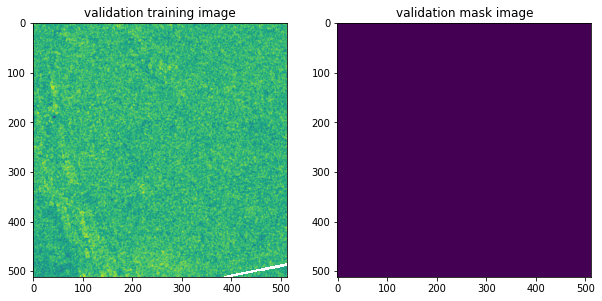

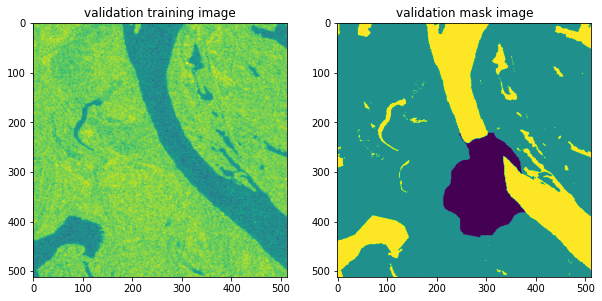

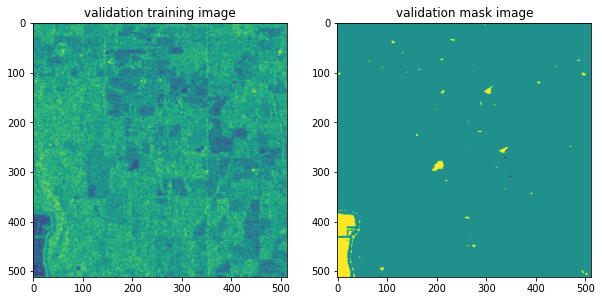

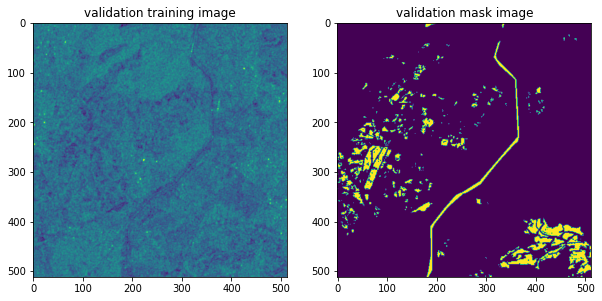

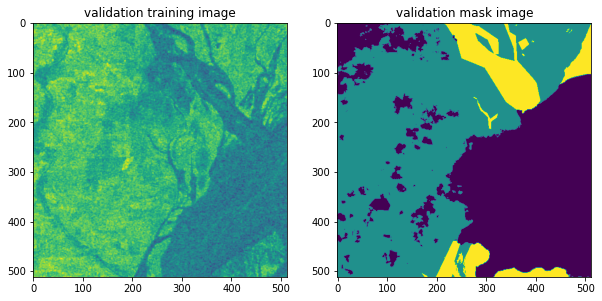

In [ ]:
import pandas as pd
val_data = '/content/flood_valid_data.csv'
val_data = pd.read_csv(val_data)


val_image_list = val_data['Val Image'].tolist()
val_mask_list = val_data['Val Label'].tolist()

# make lists for validation image and validation mask directories

val_image_dir ='/content/floodsDataset/v1.1/data/flood_events/HandLabeled/S1Hand' 
val_mask_dir = '/content/floodsDataset/v1.1/data/flood_events/HandLabeled/LabelHand'


val_image_paths=[]
for i in val_image_list:
  val_image_paths.append(str(val_image_dir+'/'+i))

val_mask_paths=[]
for i in val_mask_list:
  val_mask_paths.append(str(val_mask_dir+'/'+i))



print(f'total validation images: {len(val_image_paths)}')
print(f'total validation masks: {len(val_mask_paths)}')
print(f'First 5 training images of validation data {val_image_paths[:5]}')
print(f'First 5 masks images of validation data {val_mask_paths[:5]}')



#Test to check if images are the same
for i in range (5) :
  n = np.random.randint(len(val_image_paths))
  fig,(ax1,ax2) = plt.subplots(1,2 ,figsize=(10,10))
  ax1.imshow(tfl.imread(val_image_paths[n])[0])
  ax1.set_title('validation training image')
  ax2.imshow(tfl.imread(val_mask_paths[n]))
  ax2.set_title('validation mask image')



# Training Data and testing data Creation 

total images: 4384
total masks: 4384
['/content/floodsDataset/v1.1/data/flood_events/WeaklyLabeled/S1Weak/Bolivia_3785326_S1Weak.tif', '/content/floodsDataset/v1.1/data/flood_events/WeaklyLabeled/S1Weak/Mekong_421527_S1Weak.tif', '/content/floodsDataset/v1.1/data/flood_events/WeaklyLabeled/S1Weak/Colombia_7607839_S1Weak.tif', '/content/floodsDataset/v1.1/data/flood_events/WeaklyLabeled/S1Weak/Mekong_9978251_S1Weak.tif', '/content/floodsDataset/v1.1/data/flood_events/WeaklyLabeled/S1Weak/Mekong_1859124_S1Weak.tif']
['/content/floodsDataset/v1.1/data/flood_events/WeaklyLabeled/S2IndexLabelWeak/Bolivia_3785326_S2IndexLabelWeak.tif', '/content/floodsDataset/v1.1/data/flood_events/WeaklyLabeled/S2IndexLabelWeak/Mekong_421527_S2IndexLabelWeak.tif', '/content/floodsDataset/v1.1/data/flood_events/WeaklyLabeled/S2IndexLabelWeak/Colombia_7607839_S2IndexLabelWeak.tif', '/content/floodsDataset/v1.1/data/flood_events/WeaklyLabeled/S2IndexLabelWeak/Mekong_9978251_S2IndexLabelWeak.tif', '/content/flo

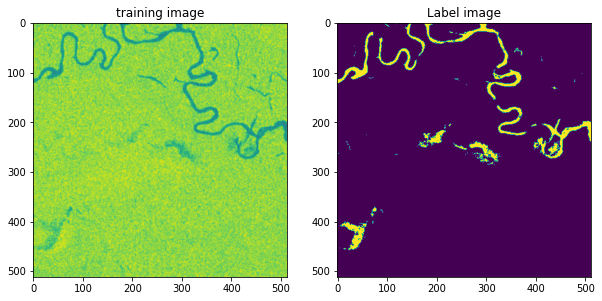

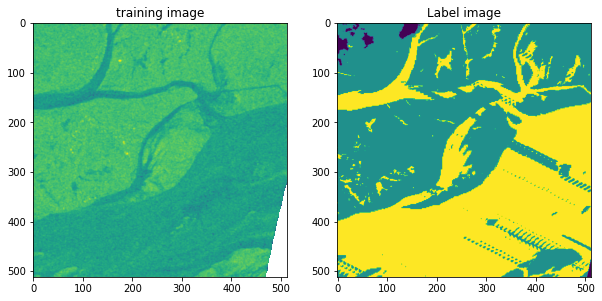

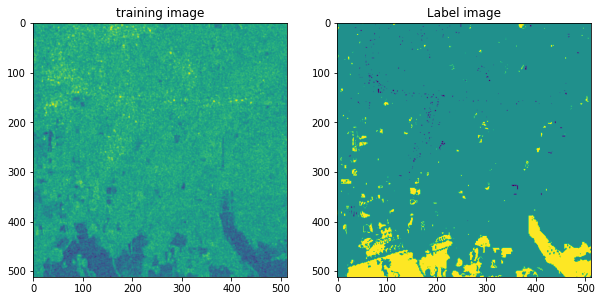

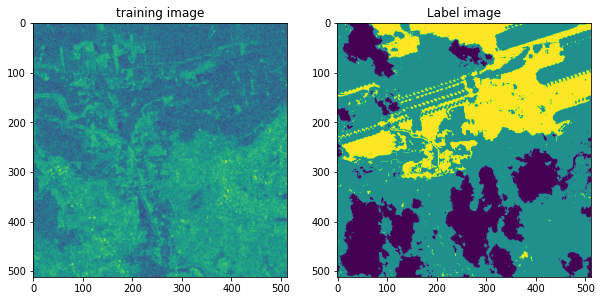

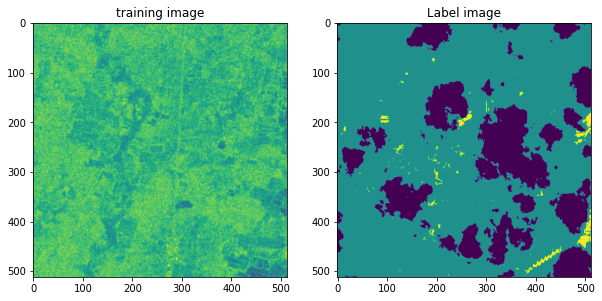

In [ ]:
# make lists for image and mask directories
import glob
import random 

images_dir ='/content/floodsDataset/v1.1/data/flood_events/WeaklyLabeled/S1Weak'    # Change your code here for model training for both Weak Labeled and Hand Labeled datasets training data
masks_dir = '/content/floodsDataset/v1.1/data/flood_events/WeaklyLabeled/S2IndexLabelWeak' # Change your code here for model training for both Weak Labeled and Hand Labeled datasets label data

image_paths = sorted(glob.glob(f'{images_dir}/*'))
mask_paths = sorted(glob.glob(f'{masks_dir}/*'))


# number of validation samples
test_samples = round(len(image_paths)*0.3)
# test_samples = round()

random.Random(1337).shuffle(image_paths)
random.Random(1337).shuffle(mask_paths)

# Split our img paths into a training and a validation set
train_image_paths = image_paths[:-test_samples]
train_mask_paths = mask_paths[:-test_samples]

test_image_paths = image_paths[-test_samples:]
test_mask_paths = mask_paths[-test_samples:]




print(f'total images: {len(image_paths)}')
print(f'total masks: {len(mask_paths)}')
print(image_paths[:5])
print(mask_paths[:5])


print(f'total test images: {len(test_image_paths)}')
print(f'total test masks: {len(test_mask_paths)}')
print(test_image_paths[:5])
print(test_mask_paths[:5])



# #Test to check if images are the same
for i in range (5) :
  n = np.random.randint(len(train_image_paths))
  fig,(ax1,ax2) = plt.subplots(1,2 ,figsize=(10,10))
  ax1.imshow(tfl.imread(train_image_paths[n])[0])
  ax1.set_title('training image')
  ax2.imshow(tfl.imread(train_mask_paths[n]))
  ax2.set_title('Label image')



In [ ]:
from dataset import FloodDataset
from keras.callbacks import ModelCheckpoint

img_size = (512, 512)
batch_size = 16

train_gen = FloodDataset(batch_size,
                            img_size,
                            train_image_paths,
                            train_mask_paths)

test_gen = FloodDataset(batch_size,
                            img_size,
                            test_image_paths,
                            test_mask_paths)



val_gen = FloodDataset(batch_size,
                          img_size,
                          val_image_paths,
                          val_mask_paths)

x,y = train_gen[0]
print(f'Shape of training data {x.shape}, Shape of Label Data{y.shape}')

Shape of training data (16, 512, 512, 2), Shape of Label Data(16, 512, 512, 1)


In [ ]:
print(len(train_gen),len(test_gen),len(val_gen))

191 82 5


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall
from loss import bce_dice_loss, dice_coef
from metrics import recall_m,precision_m,f1_m

activation_function = 'sigmoid'
num_classes = 1

from models import UNet
model = UNet(num_classes = num_classes,
         image_size = 512, 
         img_channels = 2,
         activation_fn = 'sigmoid')

# from models import DeepUNet
# model =  DeepUNet(num_classes=num_classes,
#              image_size=512,
#              img_channels=2,
#              activation_fn = 'sigmoid',
#              )
#// Cannot test DeepNet Model yet : Error (ResourceExhaustedError: Graph execution error:)

loss = bce_dice_loss # can use 'binary_crossentropy'
optimizer = Adam()

# compile model
model.compile(optimizer = optimizer, 
              loss = loss,
              metrics = [recall_m, 
                        precision_m, 
                        f1_m])

(16, 512, 512, 1) (16, 512, 512, 1)


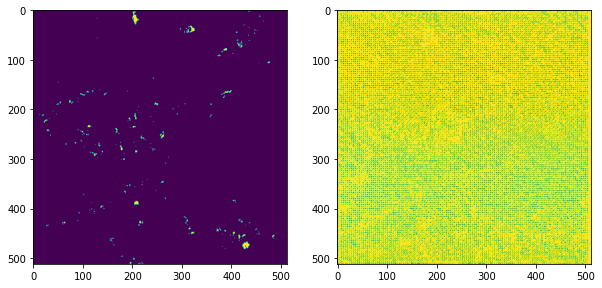

In [ ]:
# Tesing with sample model to check input shape and output shape
x,y = train_gen[0]
x.shape,y.shape

test = model.predict(x)
print(test.shape,y.shape)

fig,(ax1,ax2) = plt.subplots(1,2 ,figsize=(10,10))
ax1.imshow(np.squeeze(y)[1])
ax2.imshow(np.squeeze(test)[1])


In [ ]:
# Train the model, doing validation at the end of each epoch.
epochs = 10


# checkpoint = ModelCheckpoint("/content/Train_S1_hand_Label_s1OtSuWeak.hdf5", monitor='f1_m', verbose=1,
#     save_best_only=True, mode='auto', period=1) 

history = model.fit(train_gen,  
          epochs=epochs, 
          validation_data=test_gen,
          verbose = 1)

Epoch 1/10
191/191 [==============================] - 872s 5s/step - loss: 0.8790 - recall_m: 0.1909 - precision_m: 0.1999 - f1_m: 0.1684 - val_loss: 0.6432 - val_recall_m: 0.0175 - val_precision_m: 0.5391 - val_f1_m: 0.0337
Epoch 2/10
191/191 [==============================] - 630s 3s/step - loss: 0.5936 - recall_m: 0.2658 - precision_m: 0.4368 - f1_m: 0.2787 - val_loss: 0.5894 - val_recall_m: 0.0710 - val_precision_m: 0.6338 - val_f1_m: 0.1226
Epoch 3/10
191/191 [==============================] - 601s 3s/step - loss: 0.3400 - recall_m: 0.6548 - precision_m: 0.6529 - f1_m: 0.6369 - val_loss: 0.4551 - val_recall_m: 0.3478 - val_precision_m: 0.7624 - val_f1_m: 0.4611
Epoch 4/10
191/191 [==============================] - ETA: 0s - loss: 0.3167 - recall_m: 0.6927 - precision_m: 0.6601 - f1_m: 0.6620

In [ ]:
fig,((ax11,ax12),(ax13,ax14)) = plt.subplots(2,2,figsize=(20,15))
ax11.plot(history.history['loss'])
ax11.plot(history.history['val_loss'])
ax11.title.set_text('Unet model loss')
ax11.set_ylabel('loss')
ax11.set_xlabel('epoch')
ax11.legend(['train', 'validation'], loc='upper left')

ax12.plot(history.history['precision_m'])
ax12.plot(history.history['val_precision_m'])
ax12.set_title('Unet model precision')
ax12.set_ylabel('precision')
ax12.set_xlabel('epoch')
ax12.legend(['train', 'validation'], loc='upper left')

ax13.plot(history.history['recall_m'])
ax13.plot(history.history['val_recall_m'])
ax13.set_title('Unet model recall')
ax13.set_ylabel('recall')
ax13.set_xlabel('epoch')
ax13.legend(['train', 'validation'], loc='upper left')

ax14.plot(history.history['f1_m'])
ax14.plot(history.history['val_f1_m'])
ax14.set_title('Unet model f1')
ax14.set_ylabel('f1')
ax14.set_xlabel('epoch')
ax14.legend(['train', 'validation'], loc='upper left')
fig.savefig('5_Train_S1 Weak_Label_S1Otsu_Label_weak.png')

In [ ]:
# Validation data

loss1,recall,precision,f1 = model.evaluate(test_gen,verbose=1)
print(f"Validation Metrics on Unet \nprecision :{precision*100} \nf1 score :{f1*100} \nrecall :{recall*100} \nLoss :{loss1}")

In [ ]:
for i in range( 10):
  n = np.random.randint(len(test_image_paths))

  # print(f"Inferecne Image Path {image_paths[n]}")
  # print(f"Inference Mask Path {mask_paths[n]}")
  infer_image = test_image_paths[n]
  infer_label = test_mask_paths[n]

  sample = np.moveaxis(tfl.imread(infer_image),0,2)
  threshold = 0.9
  pred_img = np.expand_dims(sample, axis = 0)
  val_preds = model.predict(pred_img)
  val_preds = np.squeeze(val_preds)
  val_preds = val_preds > threshold

  fig,(ax1,ax2,ax3)= plt.subplots(1,3,figsize=(15,10))
  ax1.imshow(val_preds);
  ax1.set_title("Predictions")
  ax2.imshow(tfl.imread(infer_label));
  ax2.set_title("Label")
  ax3.imshow(tfl.imread(infer_image)[0]);
  ax3.set_title('Training Image')

  fig.savefig('Preds/Preds_'+str(i)+'.png')


In [ ]:
 !zip -r '/content/Preds_6_Train_S1weak_Label_S2index_labelweak.zip' '/content/Preds'

In [ ]:
model.save('/content/6_Train_S1_Weak_Label_S2IndexLabel weak.h5')